# Milestone 6 Sliding Lid
- square with dimensions 300 x 300
- three walls with hard reflecting boundaries while the fourth is a moving boundary ($u=?$)
- init conditions:
    - $ρ(t=0)=1.0$
    - $ux(t=0)=0$
    - $uy(t=0)=0 $
- streamplot to analyse the temporal evolution --> movie or calculate snapshots in time
- how does the steady state look like

In [2]:
# includes
import numpy as np
from source.algorithms.latticeBoltzman import LatticeBoltzmannMethod
import source.algorithms.BoundaryCondition as bc
import source.data.CommonDefinitions as cd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation

In [ ]:
#init data

X, Y = 300, 300
omega = 1.0
density_field = np.ones((Y, X))
velocity_field = np.zeros((2, Y,X))
time_steps = 100000
plt.style.use('classic')

# velocities = [0.25, 0.5, 0.75, 1.0]
velocities = [0.25]
raynoldsnumbers = [250, 500,750,1000]
# raynoldsnumbers = [1000]
omegas = np.ndarray((len(velocities), len(raynoldsnumbers)))

raynold_else_tuple = []
for r_idx, raynold in enumerate(raynoldsnumbers):
    velo_omega_tuple = []
    for v_idx, velo in enumerate(velocities):
        velo_omega_tuple.append([cd.get_omega_for_raynoldnumb(raynold, velo, X), velo])
    raynold_else_tuple.append([raynold, velo_omega_tuple])
test_data_dict = dict(list(raynold_else_tuple))
print(test_data_dict)

animation_timesteps = np.concatenate((np.arange(0,1000, 10),
                                     np.arange(1000, 5000, 100),
                                     np.arange(5000, time_steps, 1000)))
iterator = range(len(animation_timesteps))
produceData = False
# index = 0


{250: [[0.7142857142857143, 0.25]], 500: [[1.0526315789473684, 0.25]], 750: [[1.25, 0.25]], 1000: [[1.3793103448275863, 0.25]]}


In [ ]:

def callback(lattice: LatticeBoltzmannMethod, t: int) -> None:
    if t in animation_timesteps:
        velocities[np.where(animation_timesteps == t)] = lattice.getVelocity()
if produceData:
    for key, values in test_data_dict.items():
        for value in values:
            index = 0
            velocities = np.zeros((len(animation_timesteps+1),2, Y,X), dtype=np.float64)
            this_omega = value[0] 
            wall_speed = np.array([0, value[1]  ])
            lattice = LatticeBoltzmannMethod(X, Y, omega=this_omega , init_density=density_field, init_velocity=velocity_field, init_plot=False)
            boundary_list = []
            boundary_list.append(bc.RigidWall(cd.BoundaryAlignments.LEFT, lattice=lattice ))
            boundary_list.append(bc.RigidWall(cd.BoundaryAlignments.RIGHT, lattice=lattice ))
            boundary_list.append(bc.RigidWall(cd.BoundaryAlignments.BOTTOM, lattice=lattice ))
            boundary_list.append(bc.MovingWall(cd.BoundaryAlignments.TOP, lattice=lattice, wall_velo=wall_speed ))
            boundary_handling = bc.BoundaryHandlings(boundary_conditions=boundary_list)
            lattice.execute(timesteps=time_steps, callback=callback, boundary=boundary_handling)
            filename = "velocitiesRe"+str(int(key))+"U_x="+str( value[1]) 
            # filenameX = "velocitiesXAt"+str(int(dataset[0]))
            # filenameY = "velocitiesYAt"+str(int(dataset[0]))
            # fileX = open("log/sliding lid/{}.py".format(filenameX), "w")
            # fileY = open("log/sliding lid/{}.py".format(filenameY), "w")
            np.save("log/sliding lid/{}".format(filename), velocities)
            # for value in omegas:
            # for row in velocities:
            #     np.save(fileY, str(row[0]))
            #     np.save(fileX, str(row[1]))

            # fileX.close()
            # fileY.close()

In [ ]:
test = np.where(animation_timesteps == 90000)
print(test)

(array([225]),)


In [ ]:
showSinglePicture = True
if showSinglePicture:
    fig, ax = plt.subplots(figsize=(15,11))
    # axis = ax.flatten()
    time = 900
    x, y = np.meshgrid(np.arange(X), np.arange(Y))
    cmap = "coolwarm"
    # velo_timesteps = np.arange(1,17,1)
    plt.subplot()
    plt.title("timestep {}".format(time), size=14, y=-0.05)
    plt.xlim(-2, X+2)
    plt.xlabel('$x$ position')
    plt.ylabel('$y$ position')
    plt.ylim(-2, Y+2)
    index = int(np.where(animation_timesteps == time)[0])
    print(index)
    vy = velocities[index, 0, :, :]
    vx = velocities[index, 1, :, :]
    plt.streamplot(x, y, vx, vy, color=vx, density=2, cmap=cmap)
    plt.plot(np.arange(-1, X+1), np.ones((Y+2))*-0.5, 'r-4', linewidth=2, label="moving $U_x={}$".format(wall_speed[1]))
    plt.plot(np.arange(-1, X+1), np.ones((Y+2))*(Y+0.5), 'k', linewidth=2, label="rigid")
    plt.plot(np.ones((X))*-.5, range(Y), 'k', linewidth=2, )
    plt.plot(np.ones((X))*(X+.5), range(Y), 'k', linewidth=2)
    ax.legend(title="boundary" ,bbox_to_anchor=(1.2, 1.0), prop={'size':12})
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    color_norm = mpl.colors.Normalize(vmin=0.0, vmax=wall_speed[1])
    fig.tight_layout()
    p = ax.get_position()
    fig.colorbar(mpl.cm.ScalarMappable(norm=color_norm, cmap=cmap), \
        ax=fig.add_axes([p.x0+0.15, p.y0,p.width, p.height], visible=False), label='velocity $u$', shrink=0.5)
    plt.savefig(f'figures/Milestone6/Streamplot.png', bbox_inches='tight')
    plt.show()

# streamplot video with Raynoldsnumber 250

In [ ]:
# filename = "log/sliding lid/velocitiesRe1000U_x=0.5.npy"
# velo_data = np.load(filename)
# fig, ax = plt.subplots(figsize=(18,13))
# x, y = np.meshgrid(np.arange(X), np.arange(Y))
# cmap = "coolwarm"
# color_norm = mpl.colors.Normalize(vmin=0.0, vmax=float(filename[-7:-4]))
# p = ax.get_position()

# anim =   animation.FuncAnimation(fig, animate, frames=len(animation_timesteps), interval=50, blit=False, repeat=False)
# writermp4 = animation.FFMpegWriter(fps=10) 
# anim.save("figures/Milestone6/slidingLidRe1000.gif")#, writer=writermp4)
len(animation_timesteps)

235

# streamplot video with Raynoldsnumber 250, 500, 750, 1000

/tmp/ipykernel_18085/1817273563.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


0
0
50
100
150
200


/tmp/ipykernel_18085/1817273563.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


0
0
50
100
150
200


/tmp/ipykernel_18085/1817273563.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


0
0
50
100
150
200


/tmp/ipykernel_18085/1817273563.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


0
0
50
100
150
200


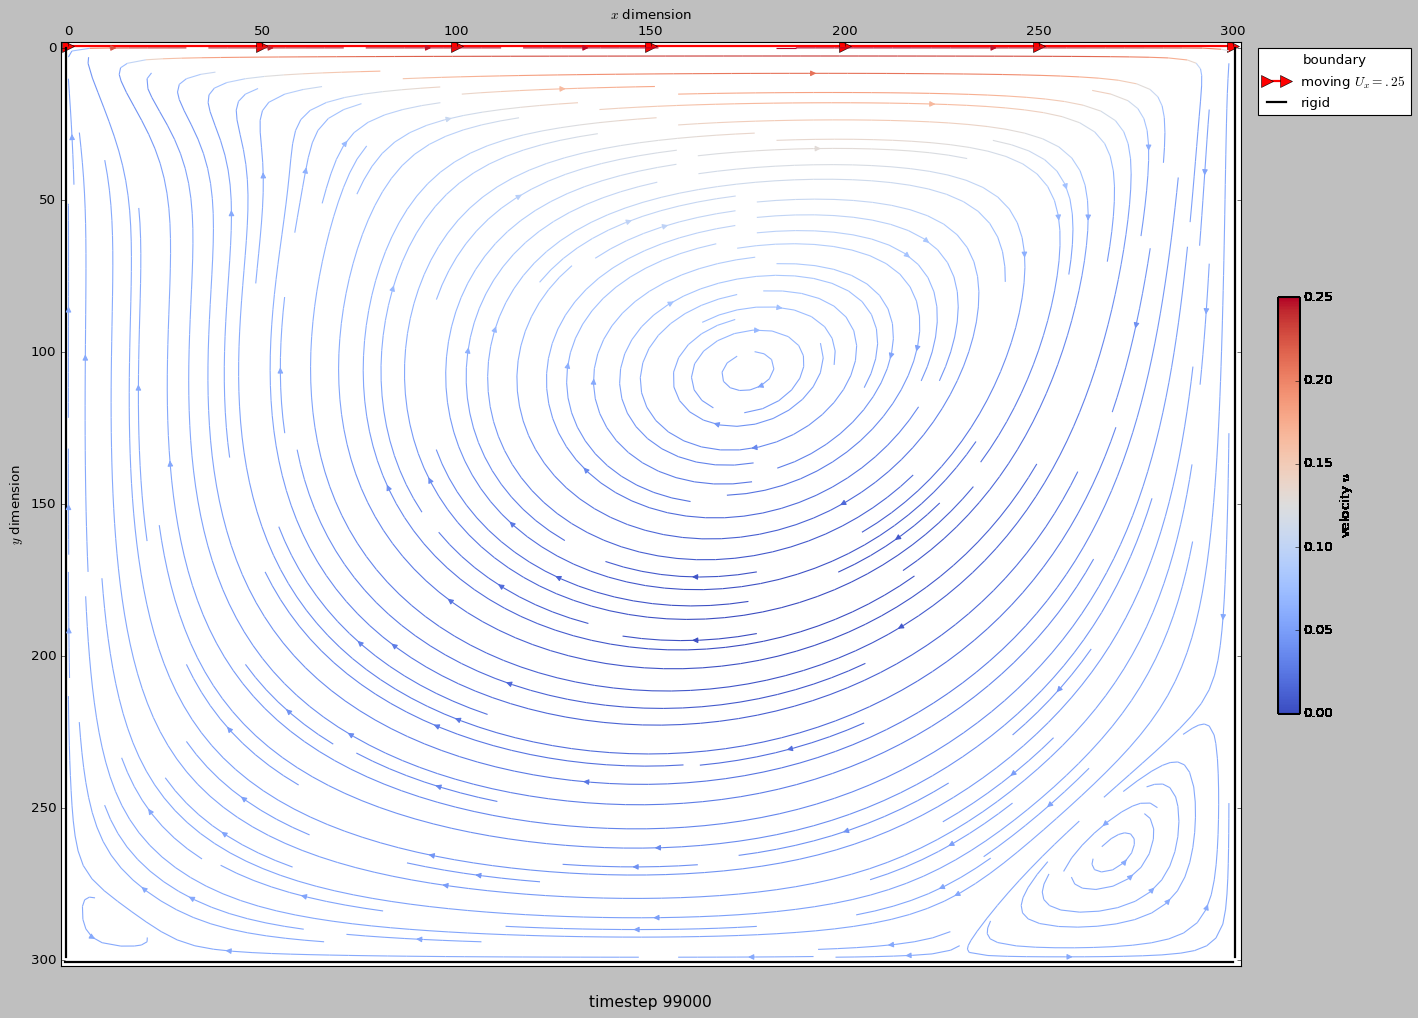

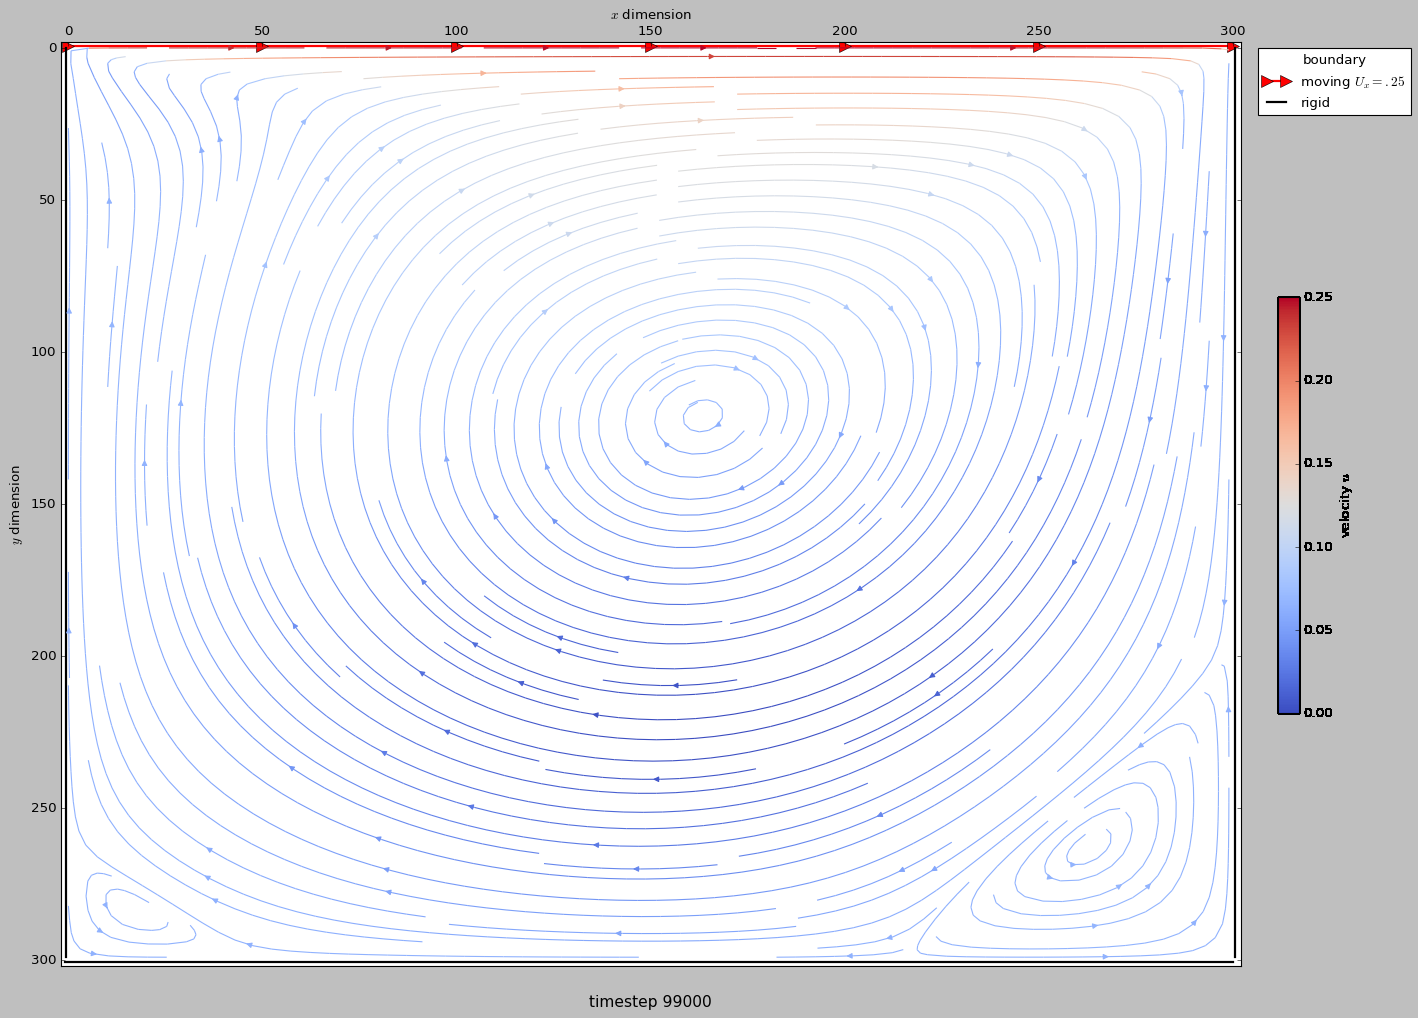

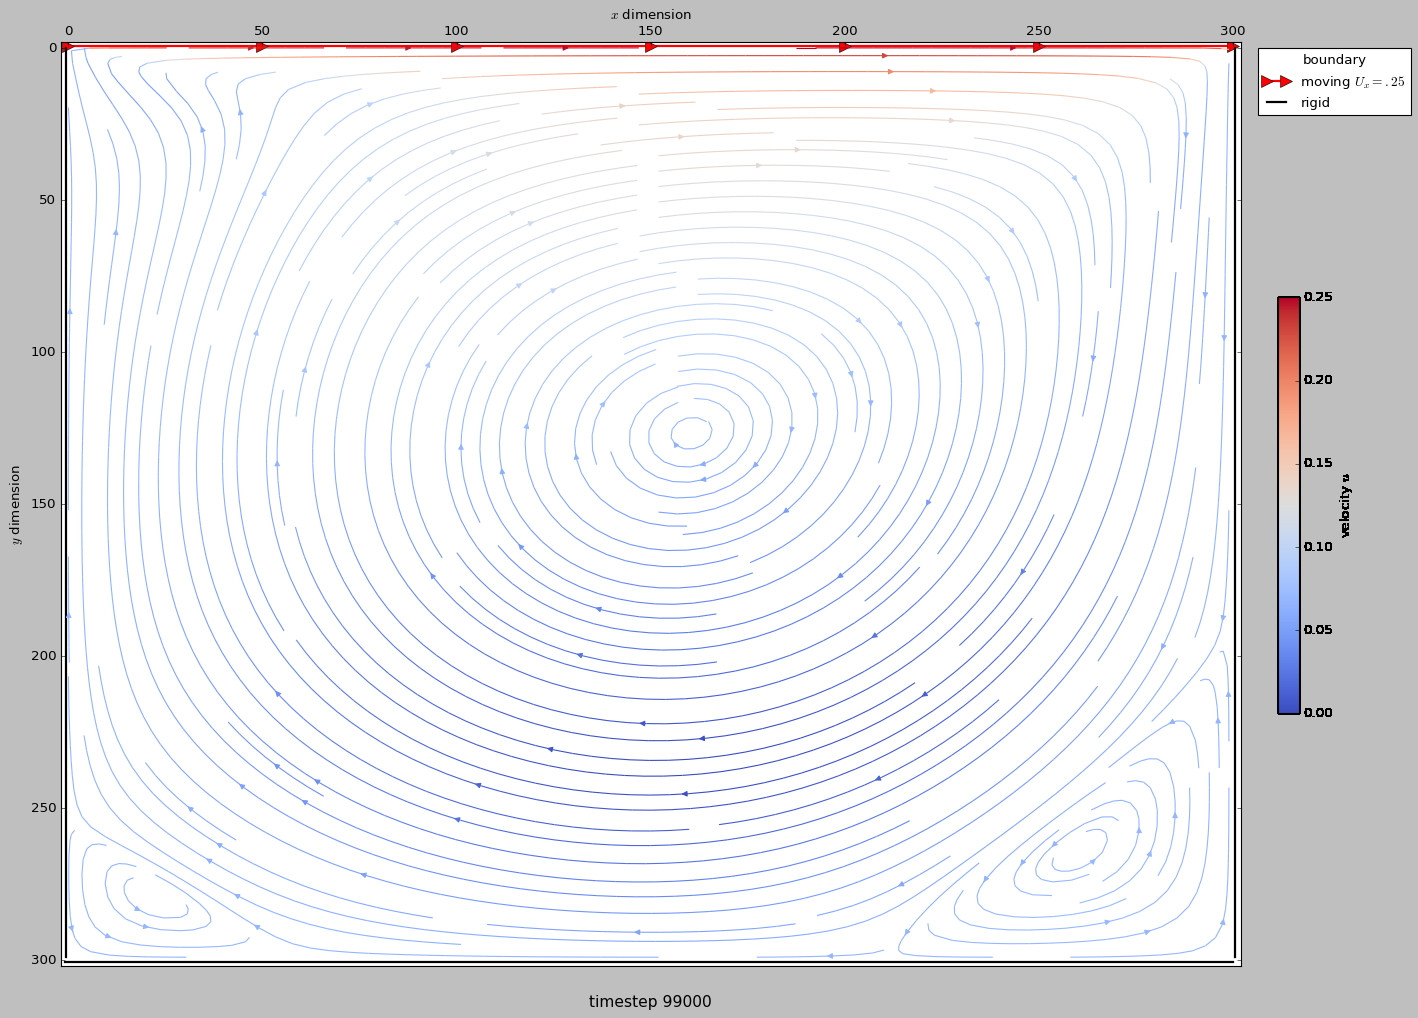

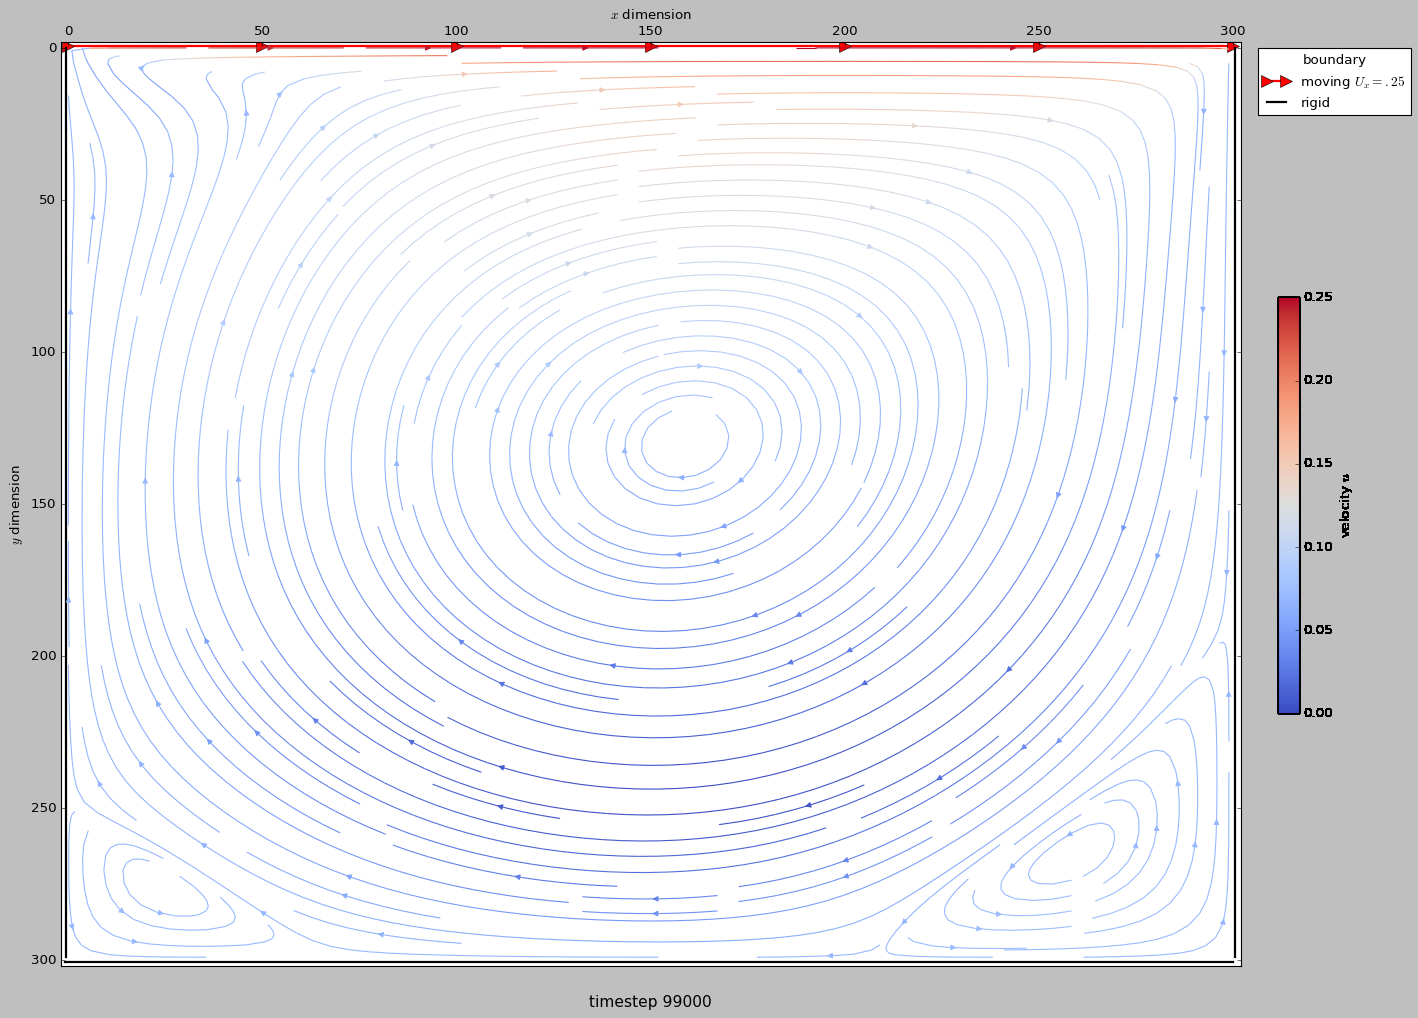

In [ ]:
x, y = np.meshgrid(np.arange(X), np.arange(Y))
cmap = "coolwarm"

# for raynoldsnumber in [500]:
for raynoldsnumber in raynoldsnumbers:
    fig, ax = plt.subplots(figsize=(18,13))
    filename = "log/sliding lid/velocitiesRe{}U_x=0.25.npy".format(raynoldsnumber)
    p = ax.get_position()
    color_norm = mpl.colors.Normalize(vmin=0.0, vmax=float(filename[-7:-4]))
    velo_data = np.load(filename)
    def animate(iter):
        ax.clear()
        fig.colorbar(mpl.cm.ScalarMappable(norm=color_norm, cmap=cmap), \
            ax=fig.add_axes([p.x0+0.115, p.y0,p.width, p.height], visible=False), label='velocity $u$', shrink=0.5)
        ax.plot(np.arange(0, X+10,50), np.ones((int((Y+2)//50)+1))*-0.5,color='r', marker = '>',markersize=10,linewidth=2, label="moving $U_x={}$".format(filename[-7:-4]))
        ax.plot(np.arange(-1, X+1), np.ones((Y+2))*(Y+0.5), 'k', linewidth=2, label="rigid")
        ax.plot(np.ones((X))*-.5, range(Y), 'k', linewidth=2, )
        ax.plot(np.ones((X))*(X+.5), range(Y), 'k', linewidth=2)
        ax.set_xlim(-2, X+2)
        ax.set_ylim(-2, Y+2)
        ax.set_xlabel('$x$ dimension')
        ax.set_ylabel('$y$ dimension')
        ax.legend(title="boundary" ,bbox_to_anchor=(1.15, 1.0), prop={'size':12})
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position("top")
        ax.set_title("timestep {}".format(animation_timesteps[iterator[iter]]), size=14, y=-0.05)
        vy = velo_data[iterator[iter], 0, :, :]
        vx = velo_data[iterator[iter], 1, :, :]
        stream = ax.streamplot(x, y, vx, vy, color=vx, density=2, cmap=cmap, arrowsize=1)
        plt.tight_layout()  
        if iter%50 ==0:
            print(iter)
        return stream
    # anim =   animation.FuncAnimation(fig, animate, frames=5, interval=40, blit=False, repeat=False)
    anim =   animation.FuncAnimation(fig, animate, frames=len(animation_timesteps), interval=30, blit=False, repeat=False)
    writermp4 = animation.FFMpegWriter(fps=40) 
    anim.save("figures/Milestone6/slidingLidRe{}.mp4".format(raynoldsnumber), writer=writermp4)

### visualize streamplot
